# SKIN CANCER CLASSIFICATION || TENSORFLOW - CNN 

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf


from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras
from  tensorflow.keras.models import Model,load_model,Sequential
from  tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from  tensorflow.keras.optimizers import Adam, Adamax
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [2]:
#Loading Data Set
df=pd.read_csv('/kaggle/input/data-skin/hmnist_28_28_RGB.csv')
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


## Exploratory Data Analysis and Preprocessing

In [3]:
df.shape

(10015, 2353)

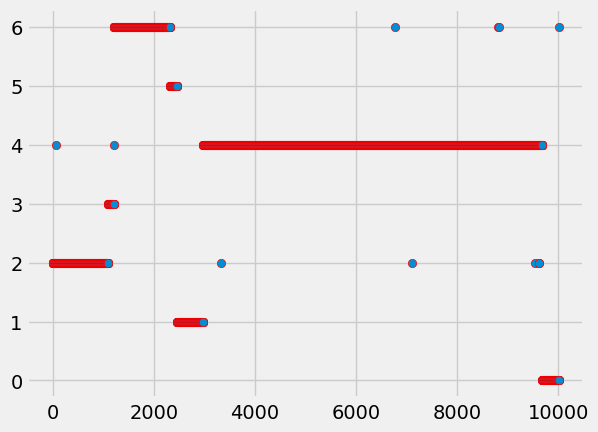

In [34]:
x_values=np.arange(len(df))
plt.scatter(x_values,df['label'],edgecolors='red');

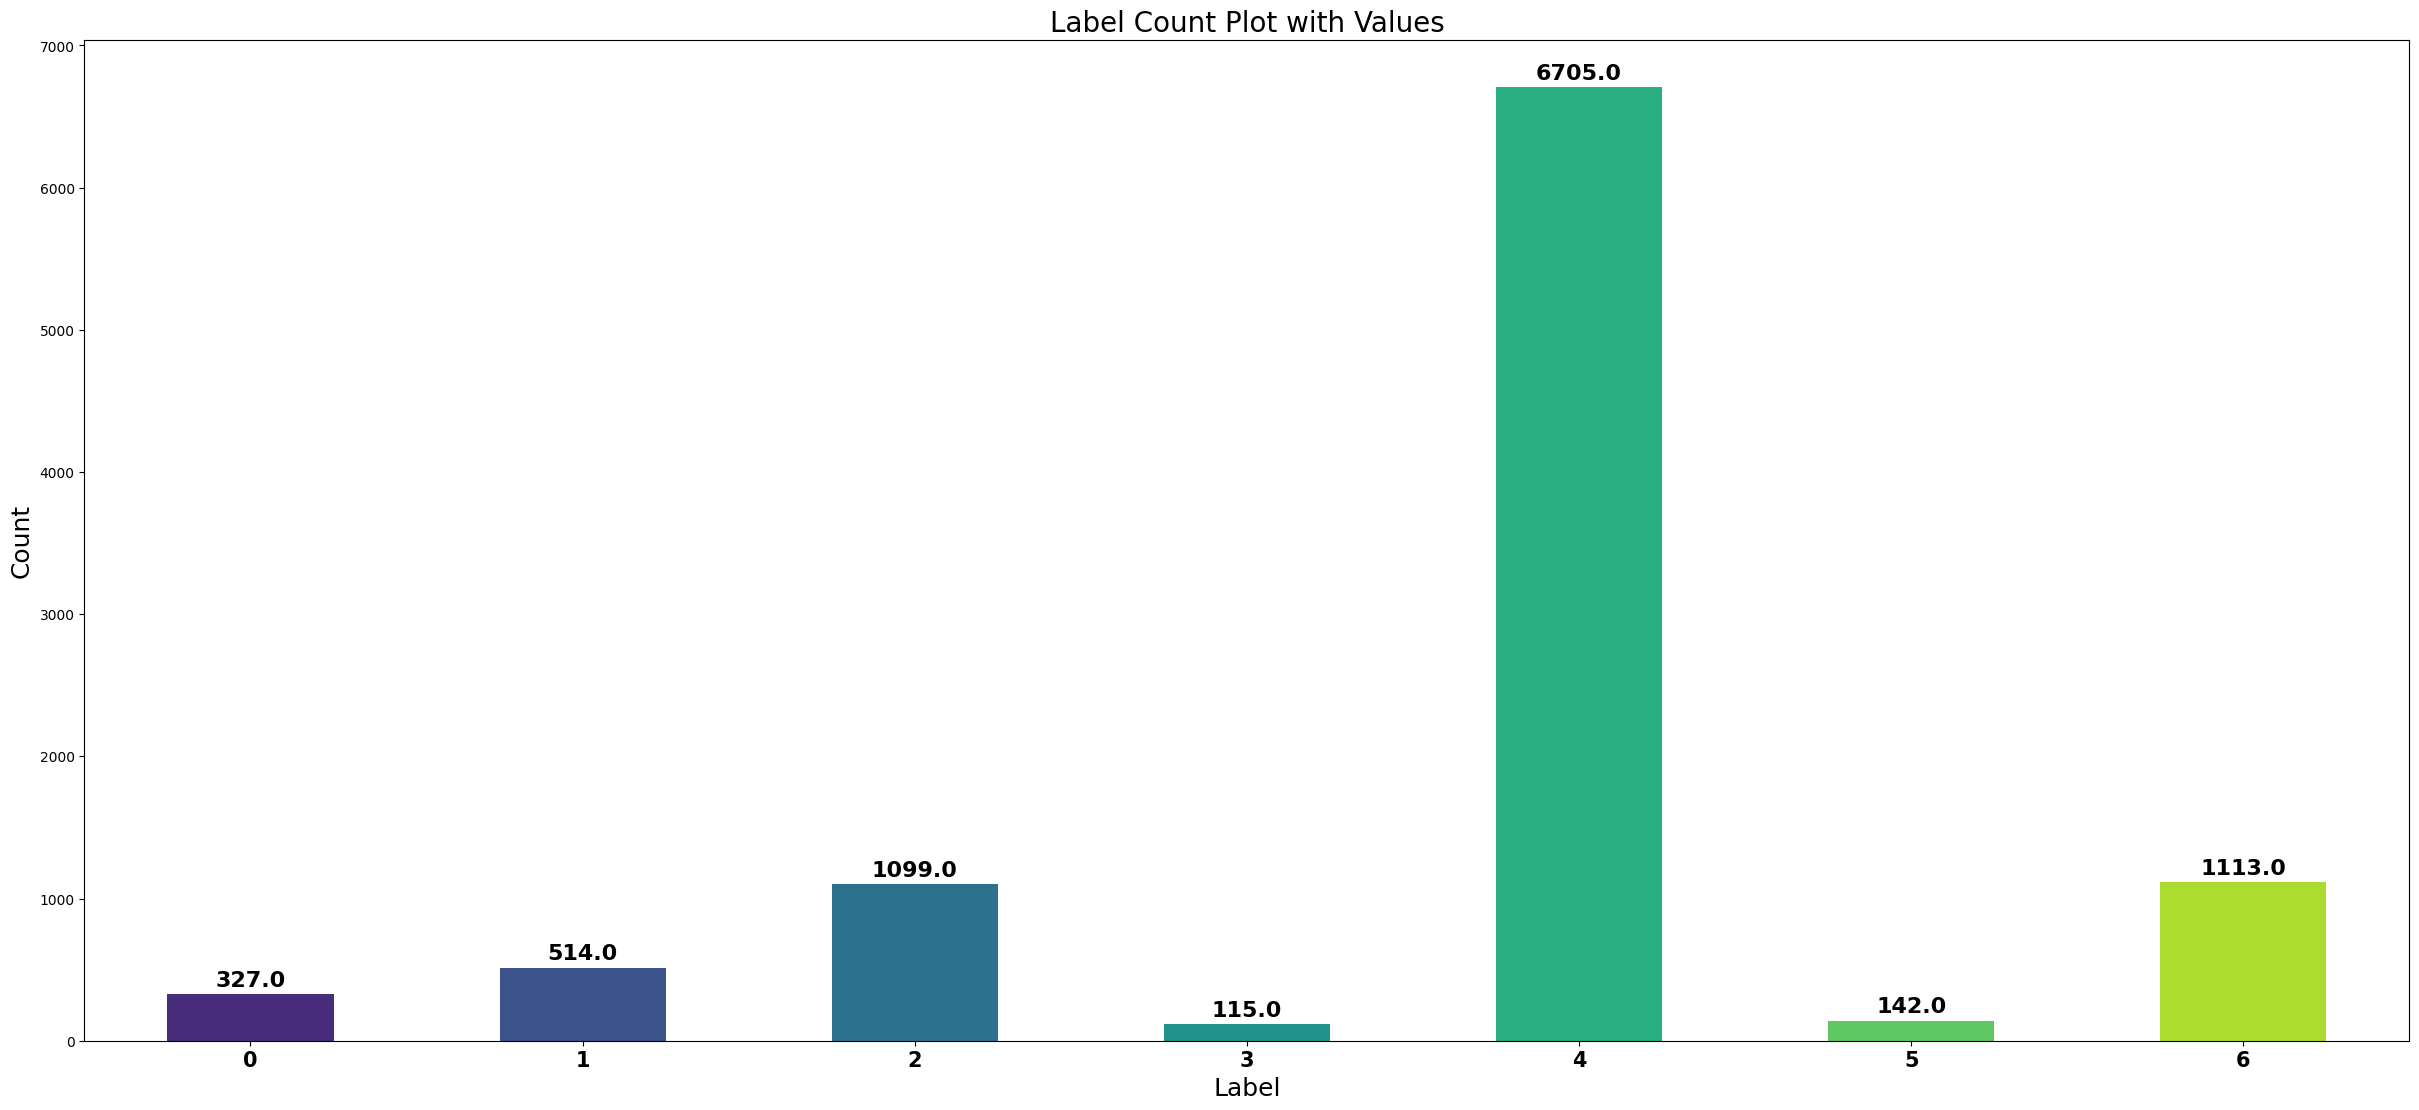

In [5]:
#Countplot;
plt.figure(figsize=(30,13))
ax=sns.countplot(x='label',data=df,palette='viridis',saturation=1,width=0.5)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,fontweight='bold')
ax.set_xlabel('Label', fontsize=18 )
ax.set_ylabel('Count', fontsize=18 )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16, fontweight='bold',color='black')
plt.title('Label Count Plot with Values',fontsize=20)
plt.show()  

In [6]:
df['label'].unique()

array([2, 4, 3, 6, 5, 1, 0])

In [7]:
classes={0:'akiec',
                1:'bcc',
                2:'bkl',
                3:'df',
                4:'nv',
                5:'vasc',
                6: 'mel'}


In [8]:
# Splitting train and test
X=df.drop(columns='label')
y=df['label']

In [9]:
# Processing unbalanced datasets
ros=RandomOverSampler()
X,y=ros.fit_resample(X,y)
X=np.array(X).reshape(-1,28,28,3)
X.shape

(46935, 28, 28, 3)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [11]:
# Converting tags to categorical types
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [12]:
# Creating Image Data
datagen=ImageDataGenerator(rescale=(1./255)
                           ,validation_split=0.1
                           ,rotation_range=10
                           ,zoom_range = 0.1
                           ,width_shift_range=0.1
                           ,height_shift_range=0.1)

testgen=ImageDataGenerator(rescale=(1./255)
                          ,validation_split=0.1)

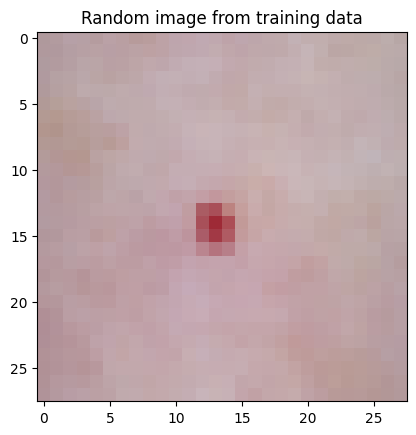

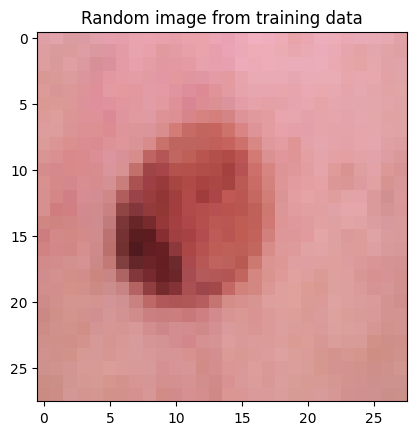

Text(0.5, 1.0, 'Random image from training data')

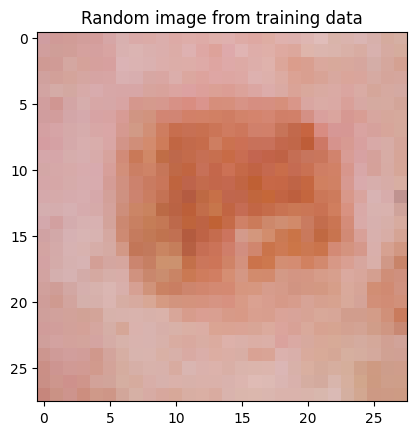

In [13]:
num=random.randint(0,8000)
X_train=np.array(X_train,dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(X_train[num].reshape(28,28,3))
plt.title('Random image from training data')
plt.show()

num=random.randint(0,8000)
plt.imshow(X_train[num].reshape(28,28,3))
plt.title('Random image from training data')
plt.show()

num=random.randint(0,8000)
plt.imshow(X_train[num].reshape(28,28,3))
plt.title('Random image from training data')

## Model Building (CNN)

In [14]:
%time

model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(28,28,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax',name='classifier'))

model.summary()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                          

## Setting Optimizer and Annealing

In [15]:
%time

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'acc'])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.5 µs


In [16]:
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50,verbose=1,mode='min'),
          tf.keras.callbacks.ModelCheckpoint(filepath='mymodel.h5',monitor='val_loss',mode='min',save_best_only=True,save_weights_only=False,verbose=1)]



In [17]:
# Fitting the model
from datetime import datetime
start_time = datetime.now()

history = model.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 128,
                    epochs = 75,
                    shuffle=True,
                    callbacks=callbacks)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/75
248/248 [==============================] - ETA: 0s - loss: 1.3556 - precision: 0.7031 - recall: 0.2850 - acc: 0.4895
Epoch 1: val_loss improved from inf to 1.57433, saving model to mymodel.h5
248/248 [==============================] - 43s 156ms/step - loss: 1.3556 - precision: 0.7031 - recall: 0.2850 - acc: 0.4895 - val_loss: 1.5743 - val_precision: 0.5295 - val_recall: 0.2394 - val_acc: 0.4138
Epoch 2/75


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


248/248 [==============================] - ETA: 0s - loss: 0.6480 - precision: 0.8394 - recall: 0.6900 - acc: 0.7653
Epoch 2: val_loss improved from 1.57433 to 1.20082, saving model to mymodel.h5
248/248 [==============================] - 39s 155ms/step - loss: 0.6480 - precision: 0.8394 - recall: 0.6900 - acc: 0.7653 - val_loss: 1.2008 - val_precision: 0.6446 - val_recall: 0.5450 - val_acc: 0.5950
Epoch 3/75
248/248 [==============================] - ETA: 0s - loss: 0.3994 - precision: 0.8898 - recall: 0.8217 - acc: 0.8557
Epoch 3: val_loss improved from 1.20082 to 0.52938, saving model to mymodel.h5
248/248 [==============================] - 38s 154ms/step - loss: 0.3994 - precision: 0.8898 - recall: 0.8217 - acc: 0.8557 - val_loss: 0.5294 - val_precision: 0.8372 - val_recall: 0.7742 - val_acc: 0.8035
Epoch 4/75
248/248 [==============================] - ETA: 0s - loss: 0.2801 - precision: 0.9190 - recall: 0.8809 - acc: 0.8999
Epoch 4: val_loss improved from 0.52938 to 0.42292, savin

## Show Training History

In [20]:
def plot_training(hist):
    tr_acc = hist.history['acc']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_acc']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'brown', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'green', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'red', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'brown', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'red', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

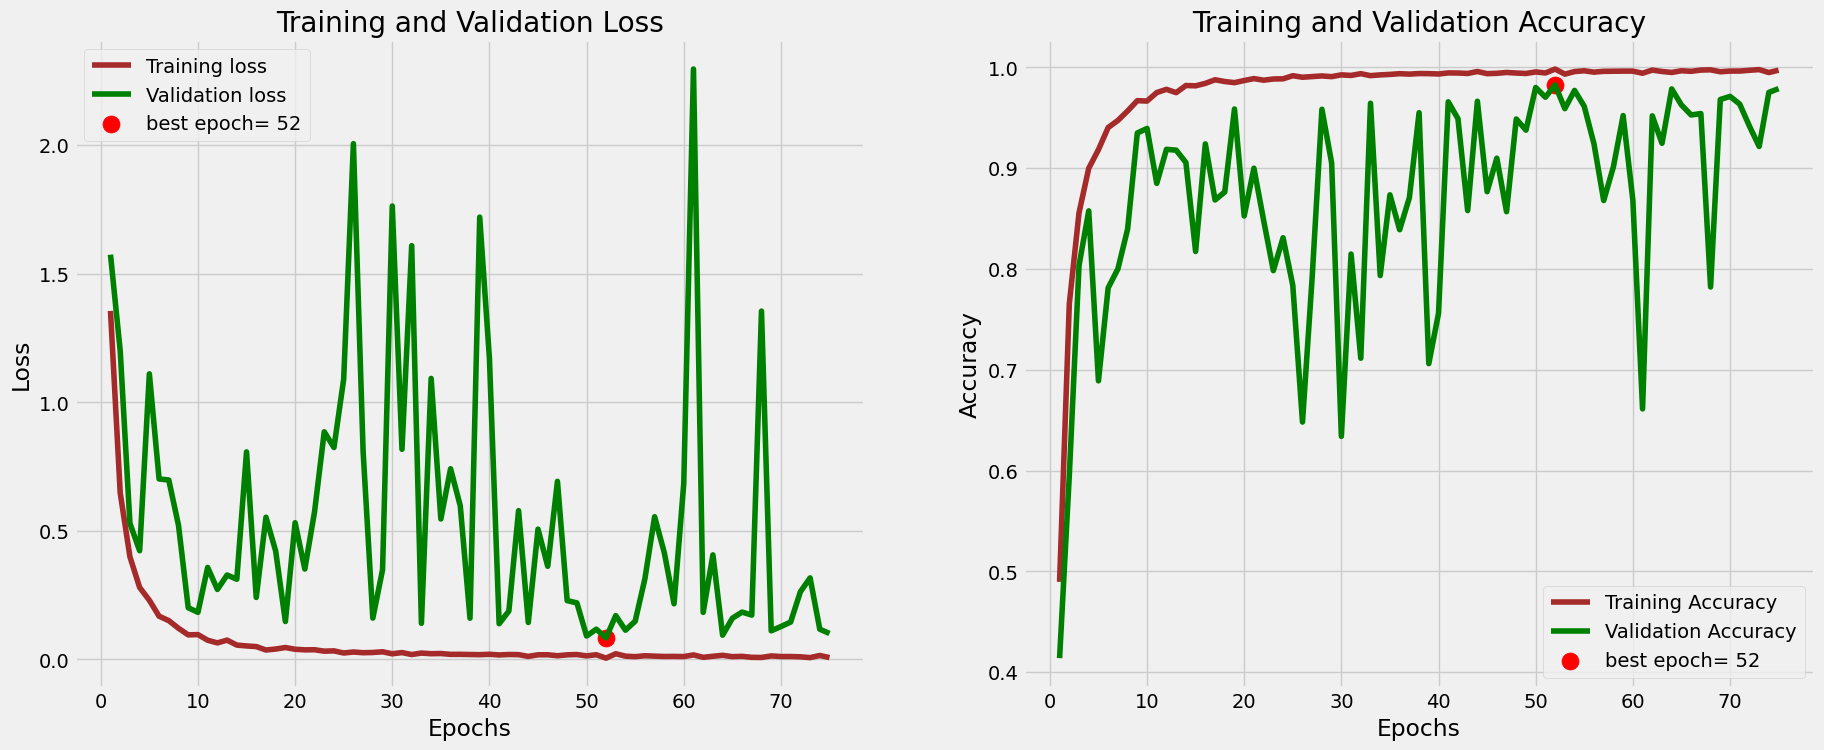

In [21]:
plot_training(history)

## Model Evaluation

In [22]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

367/367 [==============================] - 5s 13ms/step - loss: 0.0999 - precision: 0.9790 - recall: 0.9786 - acc: 0.9788
Train Loss:  0.018733862787485123
Train Accuracy:  0.995340883731842
--------------------
Test Loss:  0.09992655366659164
Test Accuracy:  0.9790263175964355


In [23]:
y_true=np.array(y_test)
y_pred=model.predict(X_test)


y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_true,axis=1)

367/367 [==============================] - 5s 13ms/step


In [24]:
# Create classes labels
classes_labels=[]
for i in classes.keys():
    classes_labels.append(i)
print(classes_labels)

[0, 1, 2, 3, 4, 5, 6]


## Confussion Matrix

In [25]:
con_matrix=confusion_matrix(y_true,y_pred,labels=classes_labels)
print(con_matrix)

[[1644    0    0    0    9    0    0]
 [   0 1588    0    0    5    0    0]
 [   0    3 1668    0   13    0    5]
 [   0    0    0 1678    0    0    0]
 [   3   23   66    2 1528    2  108]
 [   0    0    0    0    0 1706    0]
 [   0    0    0    0   10    0 1673]]


In [26]:
class_repo=classification_report(y_true,y_pred)
print(class_repo)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1653
           1       0.98      1.00      0.99      1593
           2       0.96      0.99      0.97      1689
           3       1.00      1.00      1.00      1678
           4       0.98      0.88      0.93      1732
           5       1.00      1.00      1.00      1706
           6       0.94      0.99      0.96      1683

    accuracy                           0.98     11734
   macro avg       0.98      0.98      0.98     11734
weighted avg       0.98      0.98      0.98     11734



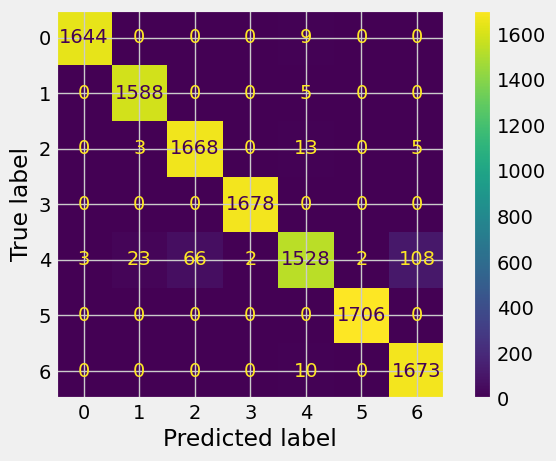

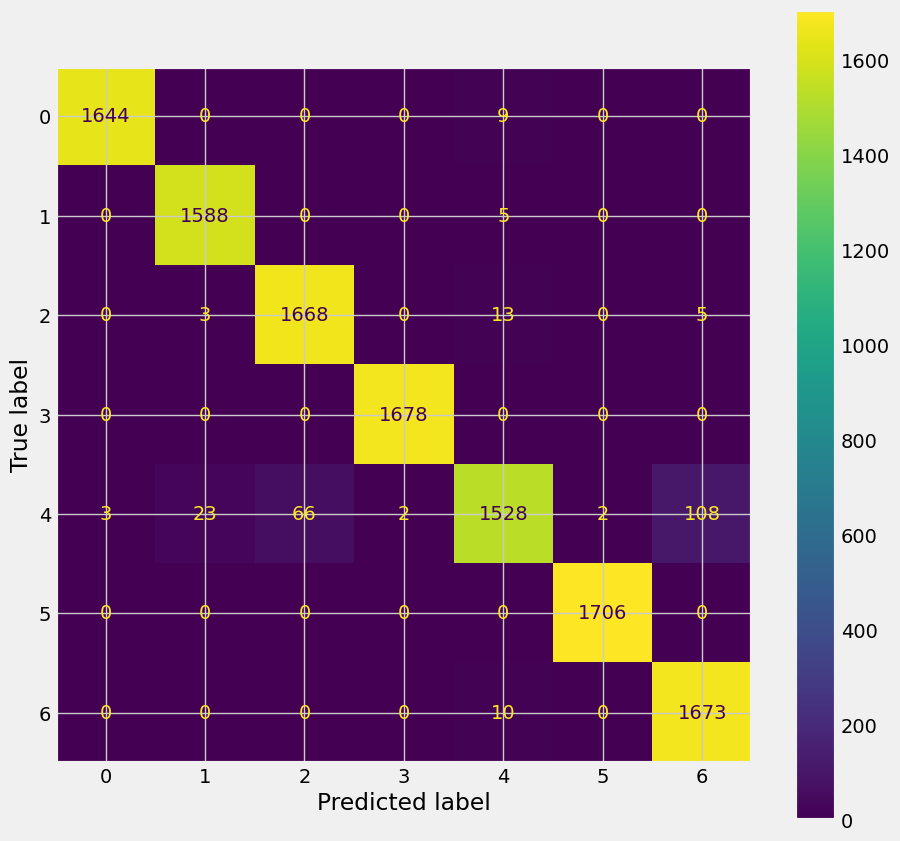

In [27]:
cmd=ConfusionMatrixDisplay.from_predictions(y_true,y_pred)
fig,ax=plt.subplots(figsize=(10,10))
cmd.plot(ax=ax);# bu bize doğruları gösteren cobfusion matrix;

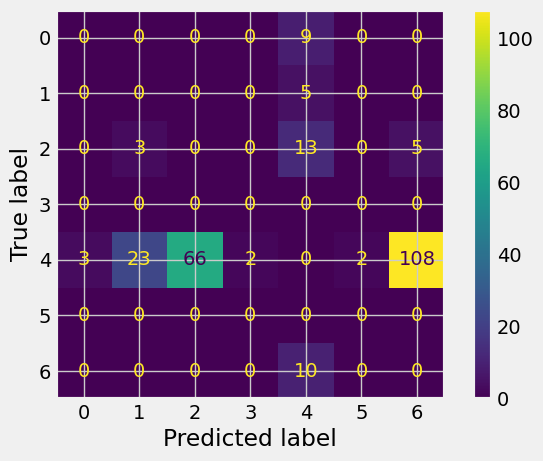

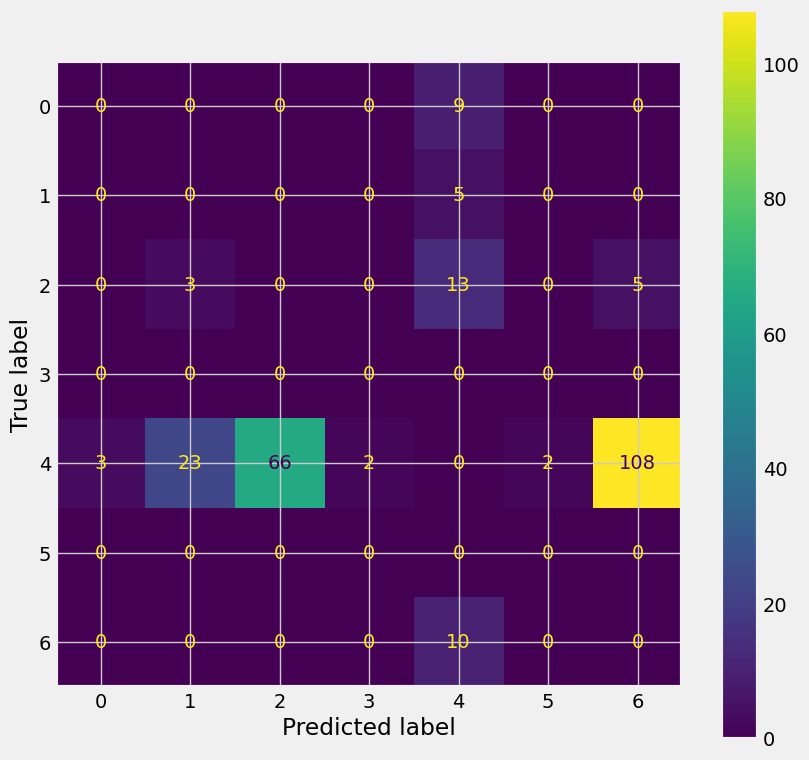

In [29]:
errors=y_true!=y_pred
cmd=ConfusionMatrixDisplay.from_predictions(y_true,y_pred,sample_weight=errors)
fig,ax=plt.subplots(figsize=(9,9))
cmd.plot(ax=ax);